# Machine Learning in Recovery Audit

## Project Overview
This project focuses on utilizing machine learning, specifically supervised algorithms, to assist Recovery Audit Companies in identifying transaction errors and determining claim amounts for vendors. The dataset used for this project was generated using the Python Faker library and consists of 1000 rows of transaction data.

## Goals
- Develop a machine learning model to classify transactions as either correct or erroneous.
- Predict claim amounts for vendors based on transaction errors.
- Automate the identification of overpayments and discrepancies in financial transactions.
- Improve audit efficiency using data-driven insights.

## Objectives
- **Data Preparation:**
  - Load and preprocess transaction data.
  - Handle missing values, data cleaning, and feature engineering.
- **Exploratory Data Analysis (EDA):**
  - Analyze transaction trends, distributions, and patterns.
  - Identify key factors contributing to payment errors.
- **Model Development:**
  - Train supervised machine learning models (e.g., SVM, logistic regression) to classify transaction errors.
  - Optimize models using hyperparameter tuning.
- **Model Evaluation:**
  - Assess model performance using accuracy, precision, recall, and F1-score.
  - Validate models using test data.
- **Deployment & Prediction:**
  - Save and load the trained model for future use.
  - Deploy the model to predict errors on new transaction data.
  - Calculate claim amounts based on overpayments.
- **Reporting & Insights:**
  - Generate detailed audit reports.
  - Provide actionable insights for recovery audit firms.

## Expected Outcomes
- A functional ML model capable of predicting erroneous transactions.
- Automated calculation of claim amounts for vendors.
- Improved accuracy in recovery audits through machine learning insights.
- A streamlined, scalable process for financial discrepancy detection.



In [7]:
#Importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading necessary the dataset
df=pd.read_excel("Recovery_Audit_Dataset.xlsx")

# Check the first few rows
df.head()

,Invoice ID,Vendor ID,Product Code,Quantity Ordered,Unit Price,Discount Applied (%),Tax Rate (%),Rebate Applied (%),Payment Terms,Previous Claims,...,Invoice Amount (Before Adjustments),Total Amount Due (With Rebate),Total Amount Due (With Tax),Payment Date,Invoice Due Date,Payment Behavior,Interest Charged,Final Total Due (Including Interest),Payment Status,Claim Amount
0,INV1000,39,A001,13,379.60,0.10,0.06,0.12,Net 60,3,...,4934.80,4174.840800,4707.799200,2023-02-24,2023-12-07,Early,0.000000,4707.799200,Underpayment,0.000000
1,INV1001,29,D004,3,296.74,0.12,0.06,0.14,Net 30,4,...,890.22,720.722112,830.397216,2023-11-03,2023-10-08,Late,0.000000,830.397216,Underpayment,0.000000
2,INV1002,15,D004,16,107.59,0.07,0.08,0.12,Net 30,2,...,1721.44,1536.901632,1729.014336,2023-12-24,2023-06-24,Late,15.369016,1744.383352,Overpayment,69.160573
3,INV1003,43,C003,6,446.96,0.12,0.09,0.08,Net 60,2,...,2681.76,2383.548288,2572.344192,2023-06-10,2023-07-02,Early,0.000000,2572.344192,Underpayment,0.000000
4,INV1004,8,B002,19,227.05,0.19,0.09,0.08,Early 10% Discount,3,...,4313.95,3529.242495,3808.786455,2023-10-12,2023-07-11,Late,35.292425,3844.078880,Overpayment,244.337405


In [8]:
# Check the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Invoice ID                            1000 non-null   object        
 1   Vendor ID                             1000 non-null   int64         
 2   Product Code                          1000 non-null   object        
 3   Quantity Ordered                      1000 non-null   int64         
 4   Unit Price                            1000 non-null   float64       
 5   Discount Applied (%)                  1000 non-null   float64       
 6   Tax Rate (%)                          1000 non-null   float64       
 7   Rebate Applied (%)                    1000 non-null   float64       
 8   Payment Terms                         1000 non-null   object        
 9   Previous Claims                       1000 non-null   int64         
 10  A

In [9]:
# Get summary statistics of numerical columns
df.describe()

,Vendor ID,Quantity Ordered,Unit Price,Discount Applied (%),Tax Rate (%),Rebate Applied (%),Previous Claims,Amount Paid,Invoice Amount (Before Adjustments),Total Amount Due (With Rebate),Total Amount Due (With Tax),Payment Date,Invoice Due Date,Interest Charged,Final Total Due (Including Interest),Claim Amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
mean,25.379000,9.970000,278.300500,0.151200,0.074630,0.098580,1.900000,2580.007723,2807.429590,2328.852586,2566.622459,2023-07-02 02:09:35.999999744,2023-06-28 15:53:16.800000256,9.511676,2576.134134,132.192795
min,1.000000,1.000000,50.080000,0.050000,0.050000,0.050000,0.000000,43.492482,52.550000,41.055168,45.331748,2023-01-01 00:00:00,2023-01-01 00:00:00,0.000000,45.331748,0.000000
25%,13.000000,5.000000,164.272500,0.100000,0.060000,0.070000,1.000000,883.909935,990.165000,822.078705,893.682848,2023-03-30 00:00:00,2023-03-28 00:00:00,0.000000,899.982726,0.000000
50%,26.000000,10.000000,285.120000,0.150000,0.070000,0.100000,2.000000,1950.007655,2253.120000,1837.606500,2043.113109,2023-07-02 12:00:00,2023-06-30 00:00:00,0.000000,2059.475632,35.459435
75%,37.000000,15.000000,392.407500,0.200000,0.090000,0.120000,3.000000,3808.474286,4275.210000,3530.041631,3838.419205,2023-09-30 00:00:00,2023-09-23 06:00:00,13.192431,3859.813497,179.662895
max,49.000000,19.000000,499.870000,0.250000,0.100000,0.150000,4.000000,10277.109494,9457.060000,8619.164484,9234.819090,2023-12-31 00:00:00,2023-12-31 00:00:00,76.921087,9234.819090,1648.919785
std,14.122138,5.467815,130.995472,0.057063,0.014849,0.029639,1.437382,2071.098208,2169.271333,1817.051215,2006.114201,NaN,NaN,16.250697,2013.541914,213.387181


In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['Invoice ID', 'Product Code', 'Payment Terms', 'Payment Behavior',
       'Payment Status'],
      dtype='object')
Numerical Columns: Index(['Vendor ID', 'Quantity Ordered', 'Unit Price', 'Discount Applied (%)',
       'Tax Rate (%)', 'Rebate Applied (%)', 'Previous Claims', 'Amount Paid',
       'Invoice Amount (Before Adjustments)', 'Total Amount Due (With Rebate)',
       'Total Amount Due (With Tax)', 'Interest Charged',
       'Final Total Due (Including Interest)', 'Claim Amount'],
      dtype='object')


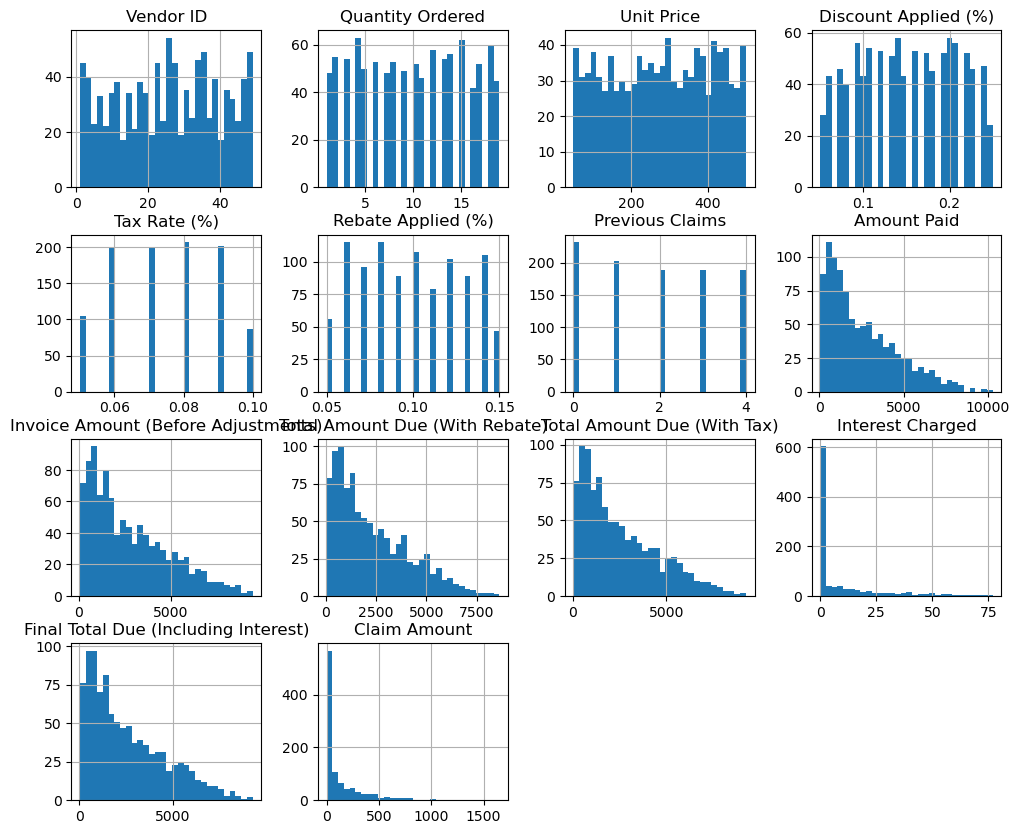

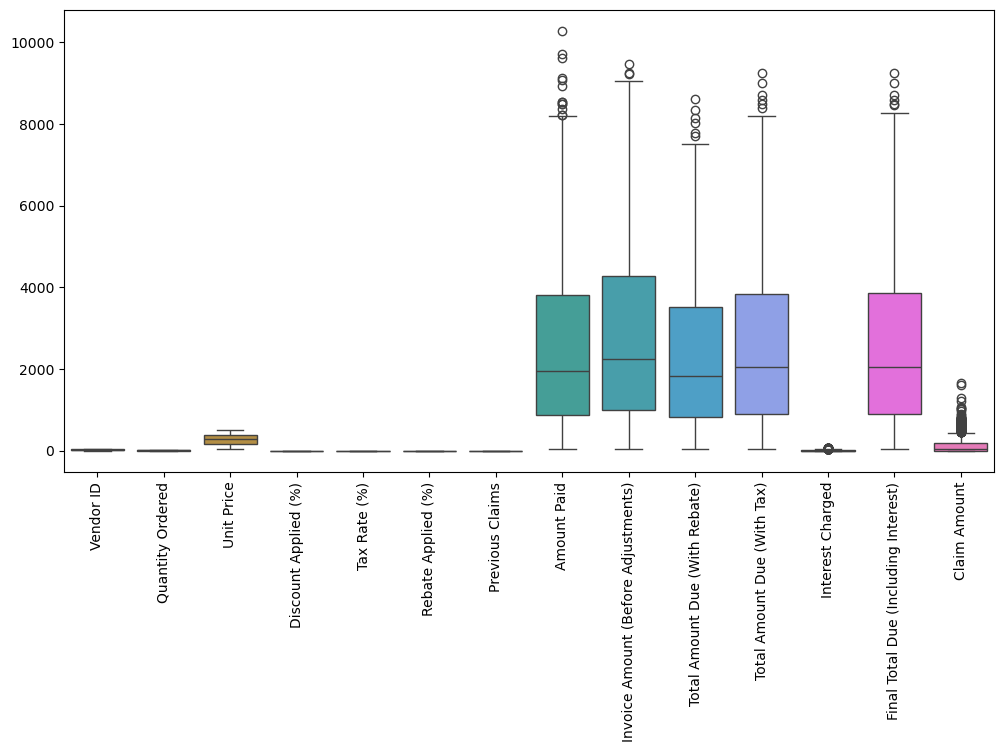

In [11]:
# Histogram for numerical features
df[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.show()


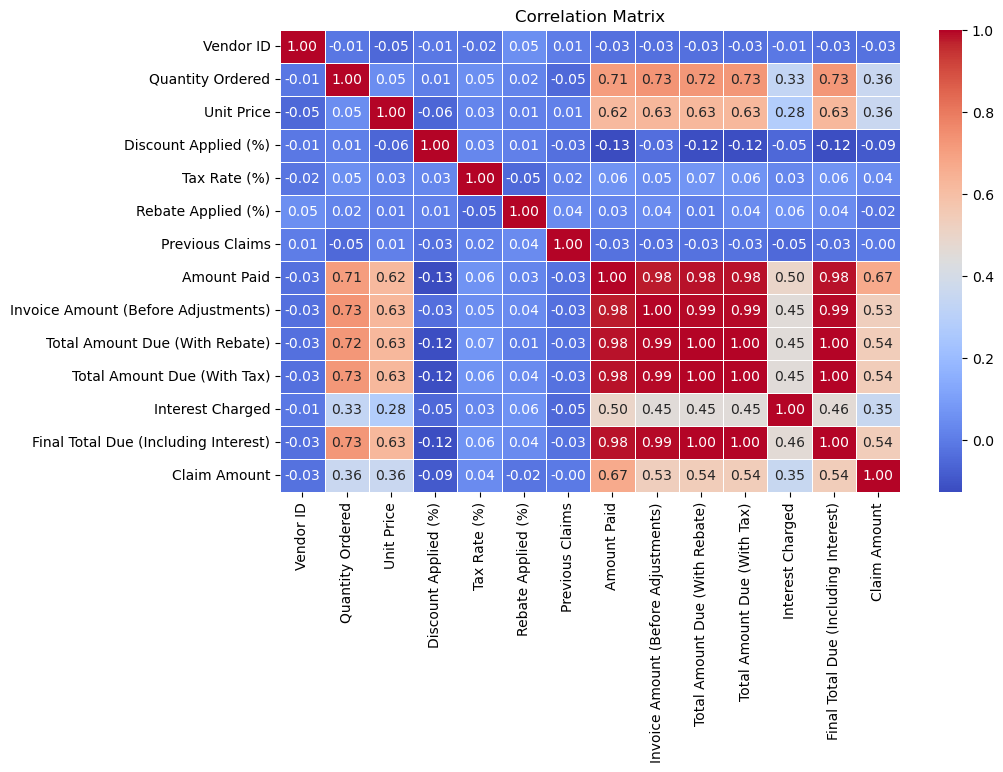

In [12]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()  # Add parentheses to call the function

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

C:\Users\Manish\AppData\Local\Temp\ipykernel_156\2411021317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Status', data=df, palette="viridis")


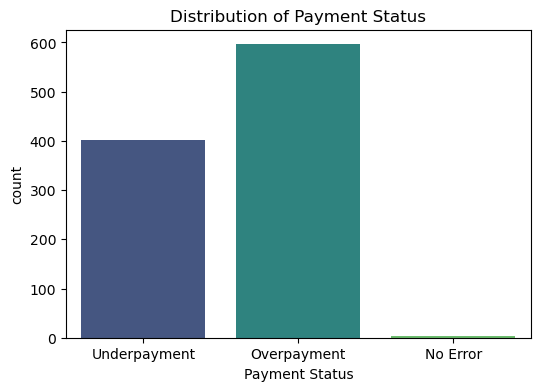

In [13]:
# Count of each payment status
plt.figure(figsize=(6, 4))
sns.countplot(x='Payment Status', data=df, palette="viridis")
plt.title("Distribution of Payment Status")
plt.show()

In [14]:
# Check for duplicates
df.duplicated().sum()

0

C:\Users\Manish\AppData\Local\Temp\ipykernel_156\216140358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.index, y=top_vendors.values, palette="Blues_r")


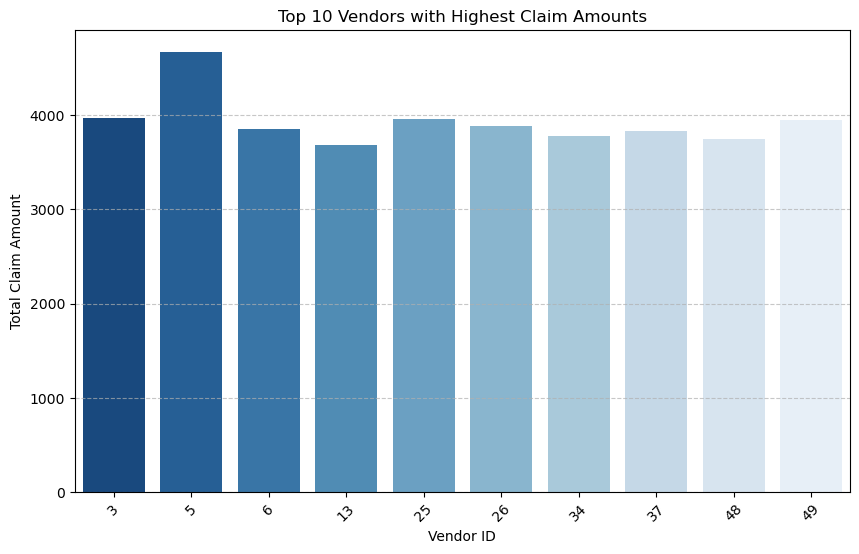

In [15]:
# Group by Vendor ID and sum the claim amounts
top_vendors = df.groupby("Vendor ID")["Claim Amount"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_vendors.index, y=top_vendors.values, palette="Blues_r")

# Labels and title
plt.xlabel("Vendor ID")
plt.ylabel("Total Claim Amount")
plt.title("Top 10 Vendors with Highest Claim Amounts")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Prepare the data
X = df.drop(columns=["Invoice ID", "Payment Status", "Claim Amount", "Payment Date", "Invoice Due Date"])
y = df["Payment Status"]

# Convert categorical columns to numerical (if any)
X = pd.get_dummies(X)

# Encode labels (Payment Status)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.925
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       126
           2       0.98      0.81      0.89        74

    accuracy                           0.93       200
   macro avg       0.94      0.90      0.92       200
weighted avg       0.93      0.93      0.92       200



In [18]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.74
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.83      0.80       126
           2       0.67      0.58      0.62        74

    accuracy                           0.74       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.73      0.74      0.74       200



In [19]:
# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.925
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.90      1.00      0.95       126
           2       1.00      0.80      0.89        74

    accuracy                           0.93       200
   macro avg       0.63      0.60      0.61       200
weighted avg       0.94      0.93      0.93       200



C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Example for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3)
grid_search_svm.fit(X_train, y_train)
print("Best Parameters for SVM:", grid_search_svm.best_params_)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}


In [21]:
# Retrain Random Forest with best parameters
rf_best = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=5, random_state=42)
rf_best.fit(X_train, y_train)

# Predictions
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model
print("Random Forest (Tuned) Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Random Forest (Tuned) Classification Report:")
print(classification_report(y_test, y_pred_rf_best))


Random Forest (Tuned) Accuracy: 0.74
Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.86      0.81       126
           2       0.69      0.54      0.61        74

    accuracy                           0.74       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.73      0.74      0.73       200



In [22]:
# Retrain SVM with best parameters
svm_best = SVC(C=10, kernel='linear', random_state=42)
svm_best.fit(X_train, y_train)

# Predictions
y_pred_svm_best = svm_best.predict(X_test)

# Evaluate the model
print("SVM (Tuned) Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print("SVM (Tuned) Classification Report:")
print(classification_report(y_test, y_pred_svm_best))


SVM (Tuned) Accuracy: 0.945
SVM (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.98      0.96       126
           2       1.00      0.88      0.94        74

    accuracy                           0.94       200
   macro avg       0.64      0.62      0.63       200
weighted avg       0.96      0.94      0.95       200



C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Manish\Desktop\conda_environment\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C

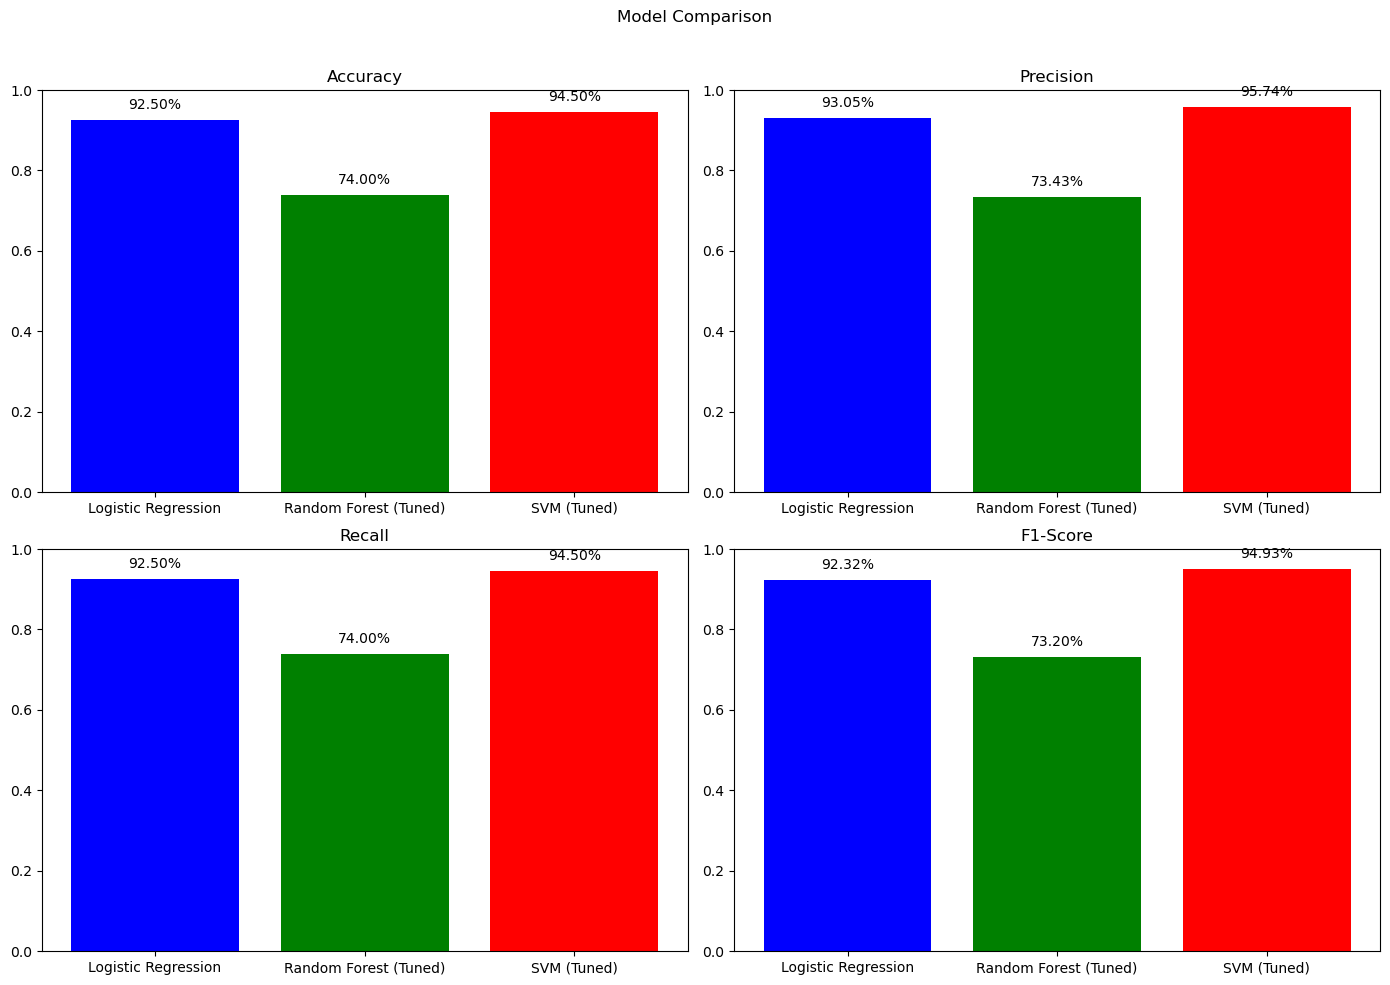

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Create a summary table for the models
models = ['Logistic Regression', 'Random Forest (Tuned)', 'SVM (Tuned)']
accuracy = [
    accuracy_score(y_test, y_pred_logreg), 
    accuracy_score(y_test, y_pred_rf_best), 
    accuracy_score(y_test, y_pred_svm_best)
]
precision = [
    classification_report(y_test, y_pred_logreg, output_dict=True)['weighted avg']['precision'],
    classification_report(y_test, y_pred_rf_best, output_dict=True)['weighted avg']['precision'],
    classification_report(y_test, y_pred_svm_best, output_dict=True)['weighted avg']['precision']
]
recall = [
    classification_report(y_test, y_pred_logreg, output_dict=True)['weighted avg']['recall'],
    classification_report(y_test, y_pred_rf_best, output_dict=True)['weighted avg']['recall'],
    classification_report(y_test, y_pred_svm_best, output_dict=True)['weighted avg']['recall']
]
f1_score = [
    classification_report(y_test, y_pred_logreg, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_rf_best, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_svm_best, output_dict=True)['weighted avg']['f1-score']
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison')

# Plot Accuracy
axes[0, 0].bar(models, accuracy, color=['blue', 'green', 'red'])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim([0, 1])

# Add numbers on top of bars for Accuracy
for i, v in enumerate(accuracy):
    axes[0, 0].text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom')

# Plot Precision
axes[0, 1].bar(models, precision, color=['blue', 'green', 'red'])
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim([0, 1])

# Add numbers on top of bars for Precision
for i, v in enumerate(precision):
    axes[0, 1].text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom')

# Plot Recall
axes[1, 0].bar(models, recall, color=['blue', 'green', 'red'])
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim([0, 1])

# Add numbers on top of bars for Recall
for i, v in enumerate(recall):
    axes[1, 0].text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom')

# Plot F1-Score
axes[1, 1].bar(models, f1_score, color=['blue', 'green', 'red'])
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_ylim([0, 1])

# Add numbers on top of bars for F1-Score
for i, v in enumerate(f1_score):
    axes[1, 1].text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [26]:
import joblib

# Save the model to a file
joblib.dump(svm_best, 'svm_model.pkl')


['svm_model.pkl']

In [35]:
import pandas as pd
import joblib

# Load the trained model, scaler, and label encoder
svm_loaded = joblib.load("svm_model.pkl")

# Load new data
new_df = pd.read_excel("to_predict.xlsx")

# Ensure new_data has the same preprocessing as the training dataset
X_new = new_df.drop(columns=["Invoice ID", "Payment Date", "Invoice Due Date"], errors="ignore")

# Convert categorical variables to numerical (must match training encoding)
X_new = pd.get_dummies(X_new)

# Standardize the features
X_new = scaler.transform(X_new)

# Make predictions
y_new_pred = svm_loaded.predict(X_new)

# Convert predicted labels back to original categories
y_new_pred_labels = le.inverse_transform(y_new_pred)

# Save predictions to a CSV file
new_df["Predicted_Payment_Status"] = y_new_pred_labels
new_df.to_csv("predictions.csv", index=False)

new_df.head()


,Invoice ID,Vendor ID,Product Code,Quantity Ordered,Unit Price,Discount Applied (%),Tax Rate (%),Rebate Applied (%),Payment Terms,Previous Claims,Amount Paid,Invoice Amount (Before Adjustments),Total Amount Due (With Rebate),Total Amount Due (With Tax),Payment Date,Invoice Due Date,Payment Behavior,Interest Charged,Final Total Due (Including Interest),Predicted_Payment_Status
0,INV2000,49,A001,16,275.68,0.08,0.05,0.15,Early 10% Discount,3,3286.987776,4410.88,3652.208640,4260.910080,2023-09-17,2023-12-11,Early,0.000000,4260.910080,Underpayment
1,INV2001,25,B002,5,411.92,0.24,0.09,0.15,Net 30,3,1736.226323,2059.60,1471.378240,1706.172640,2023-12-04,2023-05-31,Late,14.713782,1720.886422,Overpayment
2,INV2002,43,C003,9,185.25,0.21,0.07,0.14,Early 10% Discount,0,1335.172147,1667.25,1224.928575,1409.326425,2023-10-15,2023-04-05,Late,12.249286,1421.575711,Underpayment
3,INV2003,42,A001,2,346.14,0.12,0.06,0.11,Net 30,4,549.808776,692.28,578.746080,645.758784,2023-02-28,2023-10-14,Early,0.000000,645.758784,Underpayment
4,INV2004,38,C003,2,427.83,0.22,0.08,0.14,Net 60,4,627.369912,855.66,627.369912,720.807984,2023-07-30,2023-07-24,Late,0.000000,720.807984,Underpayment


In [38]:
# Filter rows where "Predicted_Payment_Status" is "Overpayment"
overpayment_df = new_df[new_df["Predicted_Payment_Status"] == "Overpayment"]

# Calculate the total claim amount
total_claim = (overpayment_df["Amount Paid"] - overpayment_df["Final Total Due (Including Interest)"]).sum()

print("Total Claim Amount:", "$", total_claim)


Total Claim Amount: $ 8869.976523840001
